# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

#leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [27]:
def readFile():
    df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
   
    return df

def DfAfter():
    df=readFile()
    After=df.copy()
    After=After[After["Date"]> "2015"]
    return After
#DfAfter=DfAfter()
#DfAfter.head()

def DfBefore():
    df=readFile()
    Before=df.copy()
    Before=Before[Before["Date"]< "2015"]
    return Before
Before=DfBefore()
Before.head()
    

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [34]:
def giveMax(df):
    
    Max_=df.copy()
    Max_=Max_[Max_['Element']=='TMAX']
    Max_=Max_.drop(['ID','Element'],axis=1)
    Max_=Max_.sort_values("Date")
    #print(Max_.head())
    MaxGroup=Max_.groupby('Date').agg(max)
    #MaxGroup=MaxGroup.sort_values("Date")
    return MaxGroup.reset_index()
Massimo=giveMax(Before)
print(Massimo.tail(10))

        Date  Data_Value
49030  01-01         150
55424  01-01         150
18261  01-01          56
18049  01-01          56
60994  01-01         133
      Date  Data_Value
356  12-22         133
357  12-23         133
358  12-24         139
359  12-25         100
360  12-26         106
361  12-27         189
362  12-28         194
363  12-29         128
364  12-30         117
365  12-31         139


In [58]:
def giveMin(df):
    min_=df.copy()
    min_=min_[min_['Element']=='TMIN']
    min_=min_.drop(['ID','Element'],axis=1)
    min_['Date']=min_.Date.str[5:]
    min_= min_[min_['Date'] != '02-29']
    min_=min_.sort_values("Date")
    MinGroup=min_.groupby('Date').agg(min)
    return MinGroup.reset_index()

Minimo=giveMin(Before)
print(Minimo.tail(10))

      Date  Data_Value
355  12-22        -200
356  12-23        -200
357  12-24        -167
358  12-25        -167
359  12-26        -156
360  12-27        -138
361  12-28        -166
362  12-29        -150
363  12-30        -144
364  12-31        -150


In [36]:
print(Minimo.head(10))
print(Massimo.head(10))

    Date  Data_Value
0  01-01        -160
1  01-02        -267
2  01-03        -267
3  01-04        -261
4  01-05        -150
5  01-06        -266
6  01-07        -306
7  01-08        -294
8  01-09        -278
9  01-10        -256
    Date  Data_Value
0  01-01         156
1  01-02         139
2  01-03         133
3  01-04         106
4  01-05         128
5  01-06         189
6  01-07         217
7  01-08         194
8  01-09         178
9  01-10         100


<bound method NDFrame.head of            Date  Data_Value
0    2015-01-01        -160
1    2015-01-02        -267
2    2015-01-03        -267
3    2015-01-04        -261
4    2015-01-05        -150
5    2015-01-06        -266
6    2015-01-07        -306
7    2015-01-08        -294
8    2015-01-09        -278
9    2015-01-10        -256
10   2015-01-11        -183
11   2015-01-12        -193
12   2015-01-13        -250
13   2015-01-14        -266
14   2015-01-15        -272
15   2015-01-16        -294
16   2015-01-17        -294
17   2015-01-18        -289
18   2015-01-19        -300
19   2015-01-20        -239
20   2015-01-21        -260
21   2015-01-22        -277
22   2015-01-23        -250
23   2015-01-24        -267
24   2015-01-25        -243
25   2015-01-26        -238
26   2015-01-27        -239
27   2015-01-28        -294
28   2015-01-29        -278
29   2015-01-30        -233
..          ...         ...
335  2015-12-02        -133
336  2015-12-03        -100
337  2015-12-04   

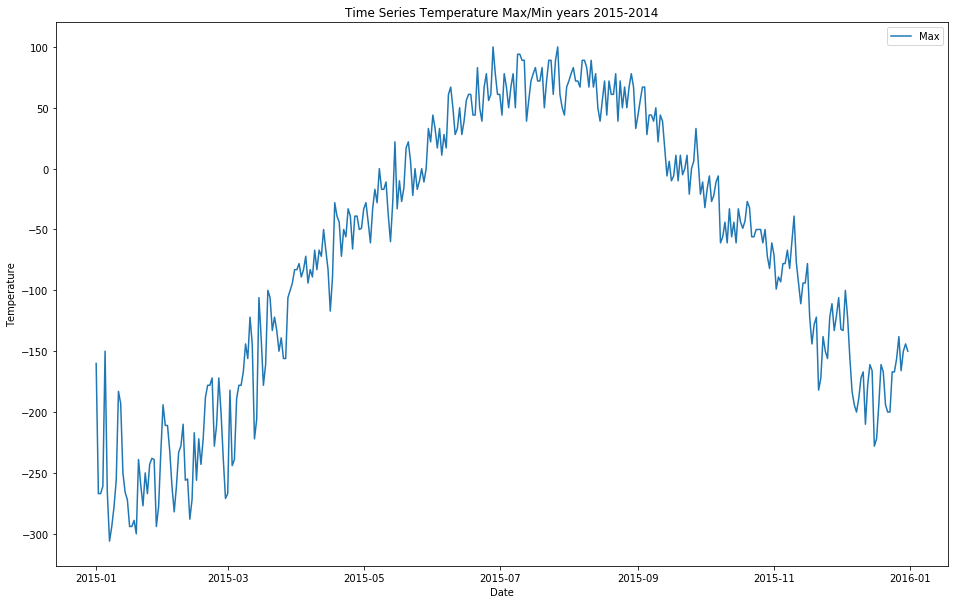

In [59]:
plt.figure(figsize=(16,10))
# plot the linear data and the exponential data
Minimo=giveMin(Before)
Minimo['Date']='2015-'+Minimo['Date']
print(Minimo.head)
observationMin_dates = list(map(pd.to_datetime, Minimo.Date))
print(observationMin_dates)
plt.plot(observationMin_dates,Minimo.Data_Value)#, '-',observationMin_dates,Massimo.Data_Value, '-')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Time Series Temperature Max/Min years 2015-2014')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Max', 'Min'])

plt.show()
